In [0]:
# Copyright 2019 Verily Life Sciences LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import display, Image, HTML

import contextlib
with contextlib.nullcontext():
  
  from iitch.abmosquito.mosquito_abm import EnvironmentModel
  from iitch.abmosquito.animation import AnimatedMosquitoModel


In [0]:
script = []
for i in range(0, 20, 2):
  script.append({
      'time': i,
      'action': 'add_mosquitoes',
      'parameters': {
          'x_coords': np.random.normal(i * 30 - 300, 1, 500),
          'y_coords': np.random.normal(0, 1, 500),
          'move_sigma_vec': np.ones(500) * 5,
          'lifespan_vec': np.random.gamma(300, 1, 500)
      }
  })

for i in range(20, 40, 2):
  script.append({
      'time': i,
      'action': 'add_traps',
      'parameters': {
          'x_coords': np.array([(i - 20) * 30 - 300]),
          'y_coords': np.array([0]),
          'attractiveness_vec': np.array([0]),
          'capture_radius_vec': np.array([3]),
          'trap_ids': np.array([i])
      }
  })

environment = EnvironmentModel(script=script, dt=.01)

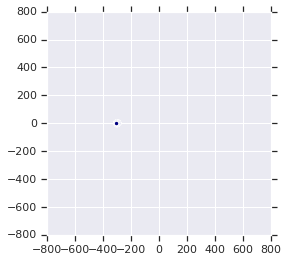

In [0]:
a = AnimatedMosquitoModel(environment, frames=800, steps_per_frame=50, axis=[-800, 800, -800, 800])

In [0]:
HTML(a.ani.to_html5_video())